In [99]:
import pandas as pd

In [100]:
data = pd.read_csv("company.csv")
data

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [101]:
data.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [102]:
data.tail()


,Company,Age,Salary,Place,Country
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India
148,NaN,NaN,NaN,NaN,NaN


In [103]:
data.shape


(149, 5)

In [104]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [105]:
data.describe()

,Age,Salary
count,130.000000,124.000000
mean,30.484615,5312.467742
std,11.096640,2573.764683
min,0.000000,1089.000000
25%,22.000000,3030.000000
50%,32.500000,5000.000000
75%,37.750000,8000.000000
max,54.000000,9876.000000


In [106]:
data.describe(include="all")

,Company,Age,Salary,Place,Country
count,140,130.000000,124.000000,134,148
unique,6,NaN,NaN,11,1
top,TCS,NaN,NaN,Mumbai,India
freq,53,NaN,NaN,37,148
mean,NaN,30.484615,5312.467742,NaN,NaN
std,NaN,11.096640,2573.764683,NaN,NaN
min,NaN,0.000000,1089.000000,NaN,NaN
25%,NaN,22.000000,3030.000000,NaN,NaN
50%,NaN,32.500000,5000.000000,NaN,NaN
75%,NaN,37.750000,8000.000000,NaN,NaN


In [107]:
data.rename(columns={"Company":"Organisation"}, inplace=True)
data.head()

,Organisation,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [108]:
data.Organisation.unique()


array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [109]:
data.Organisation.nunique()

6

In [110]:
data.Organisation.value_counts()

TCS                          53
Infosys                      45
CTS                          36
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     2
Name: Organisation, dtype: int64

In [111]:
data.columns

Index(['Organisation', 'Age', 'Salary', 'Place', 'Country'], dtype='object')

In [112]:
data["Organisation"].replace({"TCS":"Tata Consultancy Services", "CTS":"Cognizant","Congnizant":"Cognizant","Infosys Pvt Lmt":"Infosys"}, inplace= True)


In [113]:
data.Organisation.value_counts()

Tata Consultancy Services    55
Infosys                      47
Cognizant                    38
Name: Organisation, dtype: int64

In [114]:
data.duplicated().sum()

8

In [115]:
data[data.duplicated()]

,Organisation,Age,Salary,Place,Country
84,Cognizant,43.0,NaN,Mumbai,India
124,Infosys,22.0,8787.0,Calcutta,India
130,Tata Consultancy Services,21.0,4824.0,Mumbai,India
131,Infosys,NaN,5835.0,Mumbai,India
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,Tata Consultancy Services,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [116]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,Organisation,Age,Salary,Place,Country


In [117]:
data.isna().sum()

Organisation     9
Age             18
Salary          24
Place           15
Country          1
dtype: int64

In [118]:
data.dropna(subset=["Organisation"],inplace=True)
data.isna().sum()

Organisation     0
Age             15
Salary          20
Place           13
Country          0
dtype: int64

In [119]:
data.Age.median()

33.0

In [120]:
data.Age.fillna(data.Age.median(),inplace=True)
data.isna().sum()

Organisation     0
Age              0
Salary          20
Place           13
Country          0
dtype: int64

In [121]:
data.Salary.mean()

5199.642857142857

In [122]:
data.dropna(subset=["Salary","Place"], inplace = True)
data.isna().sum()

Organisation    0
Age             0
Salary          0
Place           0
Country         0
dtype: int64

In [123]:
data.shape

(100, 5)

In [124]:
data[(data.Age>40) & (data.Salary<5000)]

,Organisation,Age,Salary,Place,Country
21,Infosys,50.0,3184.0,Delhi,India
32,Infosys,45.0,4034.0,Calcutta,India
39,Infosys,41.0,3000.0,Mumbai,India
50,Infosys,41.0,3000.0,Chennai,India
57,Infosys,51.0,3184.0,Hyderabad,India
68,Infosys,43.0,4034.0,Mumbai,India
75,Infosys,44.0,3000.0,Cochin,India
86,Infosys,41.0,3000.0,Delhi,India
93,Infosys,54.0,3184.0,Mumbai,India
104,Infosys,44.0,4034.0,Delhi,India


In [125]:
data["Age"].mean()

30.8

In [126]:
data["Salary"].mean()

4951.45

In [127]:
data[["Age","Salary"]].apply(lambda x : x.mean())

Age         30.80
Salary    4951.45
dtype: float64

In [128]:
import matplotlib
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

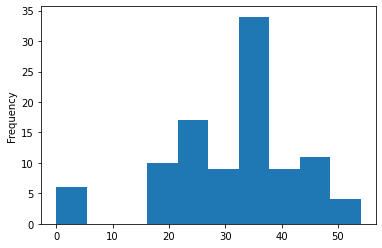

In [129]:
data.Age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

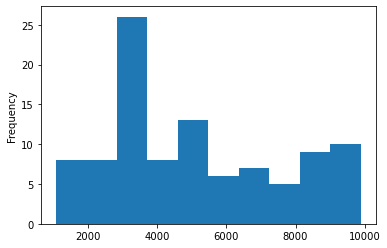

In [130]:

data.Salary.plot(kind = "hist")

<AxesSubplot:ylabel='Organisation'>

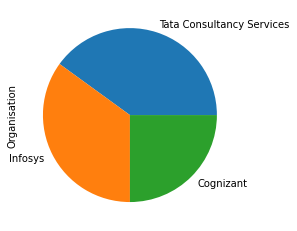

In [131]:
data.Organisation.value_counts().plot(kind="pie")

In [132]:
data.groupby("Organisation").Salary.mean()

Organisation
Cognizant                    4183.160000
Infosys                      4954.314286
Tata Consultancy Services    5429.125000
Name: Salary, dtype: float64

In [133]:
X = data[["Age"]]
y = data["Salary"]

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [136]:
train_X

,Age
8,34.0
128,33.0
92,0.0
32,45.0
70,21.0
...,...
103,22.0
22,21.0
87,21.0
110,33.0


In [137]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((70, 1), (30, 1), (70,), (30,))

In [138]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Salary'>

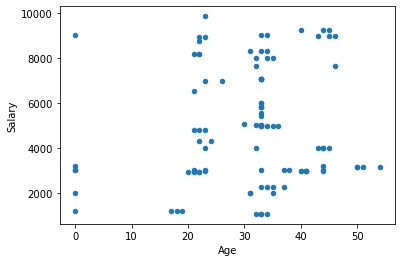

In [139]:
data.plot(kind="scatter",x="Age",y="Salary")

In [140]:

from sklearn.linear_model import LinearRegression

In [141]:
model=LinearRegression()

In [142]:
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
model.intercept_

3845.2295556299223

In [144]:
model.coef_

array([33.24298437])

In [145]:
pred_train = model.predict(train_X)

In [146]:
pred_train

array([4975.49102432, 4942.24803995, 3845.22955563, 5341.16385243,
       4543.33222747, 5075.21997744, 3845.22955563, 4942.24803995,
       5341.16385243, 4510.0892431 , 4476.84625872, 4643.06118059,
       4909.00505558, 5075.21997744, 3845.22955563, 3845.22955563,
       4576.57521184, 4942.24803995, 4942.24803995, 4609.81819622,
       4576.57521184, 4543.33222747, 4576.57521184, 4942.24803995,
       5507.37877429, 5307.92086806, 4975.49102432, 4942.24803995,
       4410.36028998, 4609.81819622, 4942.24803995, 4909.00505558,
       4942.24803995, 4609.81819622, 5374.4068368 , 4942.24803995,
       5307.92086806, 5008.7340087 , 4942.24803995, 5008.7340087 ,
       4942.24803995, 4609.81819622, 5307.92086806, 5174.94893056,
       4875.7620712 , 4609.81819622, 4443.60327435, 4942.24803995,
       4875.7620712 , 4909.00505558, 5640.35071179, 4942.24803995,
       3845.22955563, 4875.7620712 , 5174.94893056, 4942.24803995,
       4942.24803995, 5507.37877429, 4576.57521184, 5341.16385

In [151]:
pred_test = model.predict(test_X)

In [152]:
pred_test

array([4576.57521184, 4909.00505558, 5274.67788368, 5208.19191494,
       5307.92086806, 5008.7340087 , 5174.94893056, 4975.49102432,
       4942.24803995, 4543.33222747, 4942.24803995, 4543.33222747,
       4942.24803995, 5540.62175867, 5208.19191494, 5208.19191494,
       4942.24803995, 5274.67788368, 4609.81819622, 4576.57521184,
       5307.92086806, 4909.00505558, 4609.81819622, 5108.46296182,
       5374.4068368 , 4975.49102432, 5041.97699307, 5307.92086806,
       4709.54714934, 4842.51908683])

In [147]:
import matplotlib.pyplot as plt

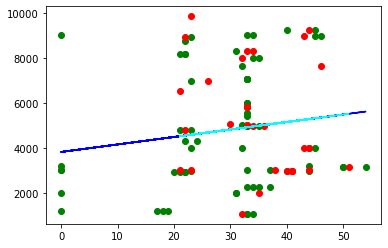

In [169]:
plt.scatter(train_X,train_y,color="green")
plt.scatter(test_X,test_y,color="red")
plt.plot(train_X,pred_train,color="blue")
plt.plot(test_X,pred_test,color="aqua")

In [165]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [170]:
mean_squared_error(train_y,pred_train)

6462794.8947598245

In [171]:
mean_squared_error(test_y, pred_test)

6362799.542283094

In [172]:
mean_absolute_error(train_y, pred_train)

2177.9008438288124

In [173]:
mean_absolute_error(test_y, pred_test)

2137.0547853526487

In [174]:
r2_score(train_y, pred_train)

0.024713238956217465

In [175]:
r2_score(test_y, pred_test)

-0.06983299009583788

In [179]:
data_Org = pd.get_dummies(data.Organisation)

In [180]:
data_place = pd.get_dummies(data.Place)

In [182]:
data_new = pd.concat([data_Org,data_place,data[["Age","Salary"]]], axis = 1)

In [184]:
X = data_new.drop(columns="Salary")

In [183]:

y = data_new["Salary"]

In [185]:
data_new.corr()

,Cognizant,Infosys,Tata Consultancy Services,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune,Age,Salary
Cognizant,1.000000,-0.423659,-4.714045e-01,-0.058026,-0.066667,-3.849002e-02,0.018452,-0.055357,0.048622,-1.333333e-02,-0.058026,0.048622,0.169224,0.174078,-0.052561,-0.174432
Infosys,-0.423659,1.000000,-5.991447e-01,0.136964,-0.036314,3.494283e-02,0.010051,0.010051,0.079453,1.210455e-02,-0.073750,-0.097110,-0.006145,-0.073750,0.144988,0.000827
Tata Consultancy Services,-0.471405,-0.599145,1.000000e+00,-0.082061,0.094281,1.510822e-17,-0.026095,0.039143,-0.120332,-3.925231e-18,0.123091,0.051571,-0.143592,-0.082061,-0.094703,0.153373
Bhopal,-0.058026,0.136964,-8.206099e-02,1.000000,-0.058026,-3.350126e-02,-0.035333,-0.035333,-0.025392,-5.802589e-02,-0.010101,-0.025392,-0.017675,-0.010101,-0.042230,0.080964
Calcutta,-0.066667,-0.036314,9.428090e-02,-0.058026,1.000000,-1.924501e-01,-0.202974,-0.202974,-0.145865,-3.333333e-01,-0.058026,-0.145865,-0.101535,-0.058026,-0.099058,-0.035221
Chennai,-0.038490,0.034943,1.510822e-17,-0.033501,-0.192450,1.000000e+00,-0.117187,-0.117187,-0.084215,-1.924501e-01,-0.033501,-0.084215,-0.058621,-0.033501,0.002918,0.115463
Cochin,0.018452,0.010051,-2.609534e-02,-0.035333,-0.202974,-1.171872e-01,1.000000,-0.123596,-0.088820,-2.029741e-01,-0.035333,-0.088820,-0.061827,-0.035333,0.031334,-0.025538
Delhi,-0.055357,0.010051,3.914302e-02,-0.035333,-0.202974,-1.171872e-01,-0.123596,1.000000,-0.088820,-2.029741e-01,-0.035333,-0.088820,-0.061827,-0.035333,0.140445,-0.016011
Hyderabad,0.048622,0.079453,-1.203325e-01,-0.025392,-0.145865,-8.421519e-02,-0.088820,-0.088820,1.000000,-1.458650e-01,-0.025392,-0.063830,-0.044431,-0.025392,0.196095,-0.056493
Mumbai,-0.013333,0.012105,-3.925231e-18,-0.058026,-0.333333,-1.924501e-01,-0.202974,-0.202974,-0.145865,1.000000e+00,-0.058026,-0.145865,-0.101535,-0.058026,-0.111188,-0.011890


In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train - MSE",mean_squared_error(train_y, pred_train))

print("Test - MSE",mean_squared_error(test_y, pred_test))

print("Train - MAE",mean_absolute_error(train_y, pred_train))

print("Test - MAE",mean_absolute_error(test_y, pred_test))

print("Train - R2 Score",r2_score(train_y, pred_train))

print("Test - R2 Score",r2_score(test_y, pred_test))

Train - MSE 6462794.8947598245
Test - MSE 6362799.542283094
Train - MAE 2177.9008438288124
Test - MAE 2137.0547853526487
Train - R2 Score 0.024713238956217465
Test - R2 Score -0.06983299009583788
